In [62]:
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt
import os
import pathlib
from torch_geometric.utils import to_networkx
import numpy as np

name = "ego"

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

def loader_to_nx(loader):
    networkx_graphs = []
    for i in range(len(loader)):
        data = loader[i]
        # data_list = batch.to_data_list()
        # for j, data in enumerate(data_list):
        networkx_graphs.append(to_networkx(data, node_attrs=None, edge_attrs=None, to_undirected=True,
                                            remove_self_loops=True))
    return networkx_graphs

def get_dataset_dir(name):
    if name == "planar":
        datadir = "data/planar/"
    elif name == "sbm":
        datadir = "data/sbm/"
    elif name == "ego":
        datadir = "data/ego/"
    elif name == "grid":
        datadir = "data/grid/"
    # base_path = pathlib.Path(os.path.realpath(__file__)).parents[2]
    return os.path.join("/home/azzolin/DiGress_fork", datadir)

config = dotdict({
            "dataset": dotdict({
                "name": name,
                "datadir": get_dataset_dir(name),
                'remove_h': None,
            }),
            "general": dotdict({
                'name': 'planar_metric_debug',
                'wandb': 'offline',
                'gpus': 1,
                'resume': None,
                'test_only': '/home/steve.azzolin/DiGress_fork/checkpoints/checkpoint_planar.ckpt',
                'sample_bigger_graphs': 0,
                'check_val_every_n_epochs': 5,
                'sample_every_val': 4,
                'val_check_interval': None,
                'samples_to_generate': 512,
                'samples_to_save': 20,
                'chains_to_save': 1,
                'log_every_steps': 50,
                'number_chain_steps': 50,
                'final_model_samples_to_generate': 10000,
                'final_model_samples_to_save': 30,
                'final_model_chains_to_save': 20,
                'evaluate_all_checkpoints': False
            }),
            "train": dotdict({
                "num_workers": 0,
                'n_epochs': 1000,
                'batch_size': 32,
                'lr': 0.0002,
                'clip_grad': None,
                'save_model': True,
                'num_workers': 0,
                'ema_decay': 0,
                'progress_bar': False,
                'weight_decay': 1e-12,
                'optimizer': 'adamw',
                'seed': 0
            }),
            'model': dotdict({
                'type': 'discrete',
                'transition': 'marginal',
                'model': 'graph_tf',
                'diffusion_steps': 500,
                'diffusion_noise_schedule': 'cosine',
                'n_layers': 5,
                'extra_features': 'all',
                'hidden_mlp_dims': {'X': 256, 'E': 128, 'y': 128},
                'hidden_dims': {'dx': 256, 'de': 64, 'dy': 64, 'n_head': 8, 'dim_ffX': 256, 'dim_ffE': 128, 'dim_ffy': 128},
                'lambda_train': [5, 0]
            }),
        })

# path = "../../GraphRNN_fork/graphs/GraphRNN_RNN_ego_4_128_pred_3000_1_bigger_119.dat"
# with open(path, "rb") as f:
#     generated = pkl.load(f)
generated = np.load(f"../graphs/ego_51_fullprec/generated_adjs.npz")

In [46]:
from src.datasets.spectre_dataset import SpectreGraphDataset, SpectreGraphDataModule
from src.analysis.spectre_utils import PlanarSamplingMetrics, SBMSamplingMetrics, EgoSamplingMetrics, GridSamplingMetrics
import random

def get_reference_graphs(name):
    if name in ["sbm", "planar", "ego", "grid"]:
        dataloaders = SpectreGraphDataModule(config)
        if name == "planar":
            digress_metric = PlanarSamplingMetrics(dataloaders)
        elif name == "sbm":
            digress_metric = SBMSamplingMetrics(dataloaders)
        elif name == "ego":
            digress_metric = EgoSamplingMetrics(dataloaders)
        elif name == "grid":
            digress_metric = GridSamplingMetrics(dataloaders)
        test_reference_graphs = digress_metric.test_graphs
        train_reference_graphs = digress_metric.train_graphs
    elif name == "grid":
        graphs = []
        for i in range(10, 20):
            for j in range(10, 20):
                graphs.append(nx.grid_2d_graph(i, j))
        random.seed(123)
        random.shuffle(graphs)
        graphs_len = len(graphs)
        test_reference_graphs = graphs[int(0.8 * graphs_len):]
        train_reference_graphs = graphs[0:int(0.8*graphs_len)]
    return test_reference_graphs, train_reference_graphs

In [47]:
reference, train = get_reference_graphs(name)

In [41]:
[len(g.nodes()) for g in train]

[5,
 4,
 4,
 4,
 9,
 13,
 4,
 10,
 4,
 5,
 5,
 4,
 7,
 8,
 4,
 4,
 4,
 5,
 6,
 4,
 7,
 4,
 9,
 4,
 11,
 4,
 4,
 5,
 9,
 15,
 4,
 5,
 5,
 7,
 4,
 5,
 4,
 5,
 5,
 6,
 8,
 4,
 4,
 4,
 6,
 8,
 4,
 4,
 4,
 5,
 12,
 7,
 4,
 6,
 5,
 5,
 11,
 4,
 5,
 5,
 12,
 8,
 8,
 6,
 4,
 7,
 7,
 4,
 12,
 4,
 5,
 4,
 4,
 6,
 4,
 12,
 5,
 4,
 4,
 6,
 6,
 8,
 7,
 6,
 4,
 9,
 8,
 7,
 4,
 11,
 8,
 4,
 7,
 4,
 6,
 4,
 4,
 14,
 5,
 4,
 4,
 4,
 5,
 7,
 4,
 5,
 4,
 4,
 11,
 13,
 7,
 12,
 4,
 4,
 8,
 7,
 18,
 5,
 4,
 7,
 15,
 6,
 5,
 5,
 4,
 4,
 8,
 6,
 4,
 7,
 4,
 4,
 8,
 8,
 4,
 5,
 4,
 5,
 13,
 4,
 6,
 7,
 18,
 5,
 4,
 9,
 4,
 11,
 15,
 4,
 7,
 4,
 4,
 5,
 4,
 5,
 9,
 4,
 7,
 5,
 12,
 4,
 4,
 5,
 7,
 5,
 4,
 4,
 5,
 6,
 8,
 5,
 12,
 7,
 4,
 4,
 5,
 5,
 4,
 5,
 11,
 11,
 5,
 6,
 8,
 10,
 6,
 4,
 5,
 6,
 4,
 6,
 7,
 4,
 8,
 4,
 7,
 7,
 7,
 7,
 7,
 17,
 12,
 5,
 5,
 9,
 4,
 4,
 11,
 7,
 4,
 7,
 5,
 4,
 7,
 4,
 5,
 4,
 17,
 4,
 4,
 4,
 8,
 5,
 13,
 4,
 4,
 8,
 4,
 5,
 14,
 6,
 4,
 4,
 8,
 4,
 6,
 4,
 15,
 9]

In [40]:
_ = [g.remove_nodes_from(list(nx.isolates(g))) for g in reference]
_ = [g.remove_nodes_from(list(nx.isolates(g))) for g in train]

121


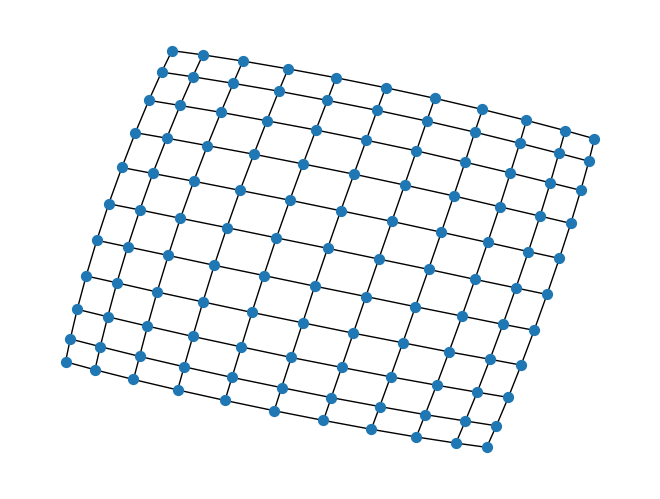

In [11]:
g = reference[5]
print(len(g.nodes()))
pos = nx.spring_layout(g, iterations=1000, seed=39775)
nx.draw(g, node_size=50, pos=pos)

In [40]:
## Check generated

In [63]:
# do only for DiGress 
generated = [nx.from_numpy_array(generated[f"arr_{id}"]) for id in range(len(generated))]

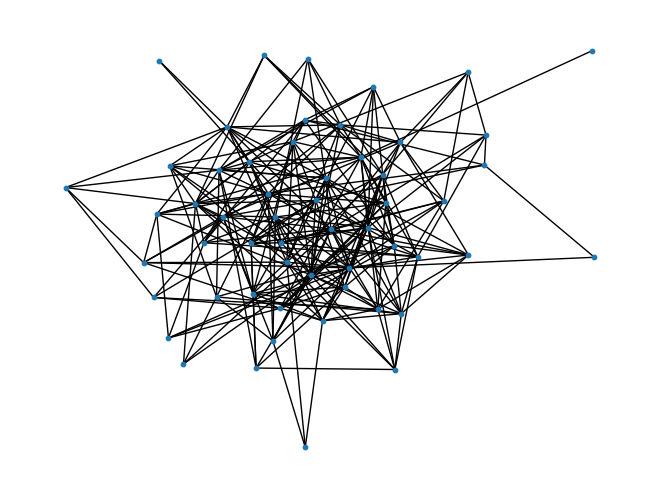

In [64]:
g = generated[0]
g.remove_nodes_from(list(nx.isolates(g)))
pos = nx.spring_layout(g, iterations=1000, seed=39775)
nx.draw(g, node_size=10)

In [65]:
np.mean([len(g.nodes()) for g in generated])

59.68359375